In [1]:
from HeaderP import *

In [2]:
import Astraea

In [164]:
def readsimdata(simNo,z,Rcut,select,Rcut_thread,zcut_thread):
    if simNo=='data':
        data=pd.read_pickle('../SecondYear/CannonDR16_cut.pkl')
        data['z_today']=data['z']
        data['x_today']=data['X']
        data['y_today']=data['Y']
        data['feh_scale']=data['M_H']
        data['ofe_scale']=data['O_FE']
        data['age']=data['Age']
    elif select:
        data=pd.read_pickle('/Users/yl4331/Desktop/SimulationData/Data/Buck_g'+simNo+'_apogee_selec.pkl')
        data['R_bir']=np.sqrt((data['x_birth'])**2+data['y_birth']**2)
        data['R']=np.sqrt((data['x_today'])**2+data['y_today']**2)
        scale_fe=0.250019907951355/0.35828184923028494
        scale_o=0.10861970484256744/0.09543676896214373
        data['feh_scale']=data['feh']*scale_fe-0.0906638577580452+0.08980628554112494
        data['ofe_scale']=data['ofe']*scale_o+0.08182460814714432-0.17121922547292423
        data['dR']=data['R']-data['R_bir']
        data['dz']=abs(data['z_today'])-abs(data['z_birth'])
    
    elif not select:
        if z=='0':
            data=pd.read_pickle('/Users/yl4331/Desktop/SimulationData/Data/Buck_g'+simNo+'.pkl')
        else:
            data=pd.read_pickle('/Users/yl4331/Desktop/SimulationData/Data/Buck_g'+simNo+'_z'+z+'.pkl')
            try:
                data['x_today']=data['x']
                data['y_today']=data['y']
                data['z_today']=data['z']
            except:
                print(np.shape(data['x_today']))

        data['R_bir']=np.sqrt((data['x_birth'])**2+data['y_birth']**2)
        data['R']=np.sqrt((data['x_today'])**2+data['y_today']**2)
        scale_fe=0.250019907951355/0.35828184923028494
        scale_o=0.10861970484256744/0.09543676896214373
        data['feh_scale']=data['feh']*scale_fe-0.0906638577580452+0.08980628554112494
        data['ofe_scale']=data['ofe']*scale_o+0.08182460814714432-0.17121922547292423
        
        if Rcut:
            data=data.loc[data['R_bir']<Rcut_thread].reset_index(drop=True)
            data=data.loc[abs(data['z_birth'])<zcut_thread].reset_index(drop=True)
        data['dR']=data['R']-data['R_bir']
        data['dz']=abs(data['z_today'])-abs(data['z_birth'])
    return data
        

# w/o radial cut

In [4]:
simNo='2_79e12'
z='0'
Rcut=False
select=False
Rcut_thread=30
zcut_thread=5


data=readsimdata(simNo,z,Rcut,select,Rcut_thread,zcut_thread)

In [567]:
data.columns

Index(['vx_birth', 'vy_today', 'vz_today', 'z_today', 'vy_birth', 'ofe',
       'iords', 'vx_today', 'x_today', 'feh', 'x_birth', 'y_birth', 'vz_birth',
       'mass', 'y_today', 'oxh', 'z_birth', 'age', 'iord', 'vx', 'vy', 'vz',
       'x', 'y', 'z', 'Jr', 'Jphi', 'Jz', 'R', 'R_bir', 'feh_scale',
       'ofe_scale', 'dR', 'dz'],
      dtype='object')

In [584]:
regr, regr_outs = Astraea.RFregressor(data, ['feh_scale','age'],
                                      target_var='R_bir', target_var_err='R_bir', n_estimators=3)

Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 2
Features attempt to train: ['feh_scale', 'age']
7528957 stars in dataframe!
7528957 total stars used for RF!
6023165 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.23007873796966277
Average chi^2 is: 0.9045199997760199
Finished!


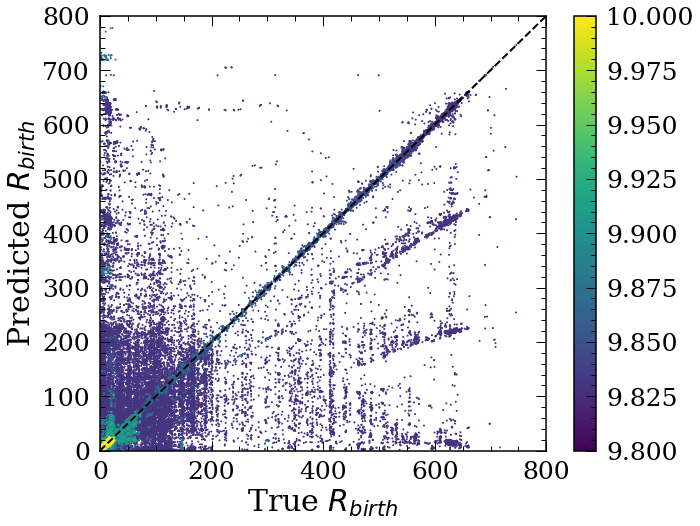

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(regr_outs['y_test'], regr_outs['prediction'], c=np.log(data_predict['mass']),s=1,vmin=9.8,vmax=10)
plt.plot([0,800],[0,800],'k--')
plt.xlabel('True $R_{birth}$')
plt.ylabel('Predicted $R_{birth}$')
plt.xlim([0,800])
plt.ylim([0,800])
cbar = plt.colorbar()
#cbar.set_label('Mass',labelpad = 5)

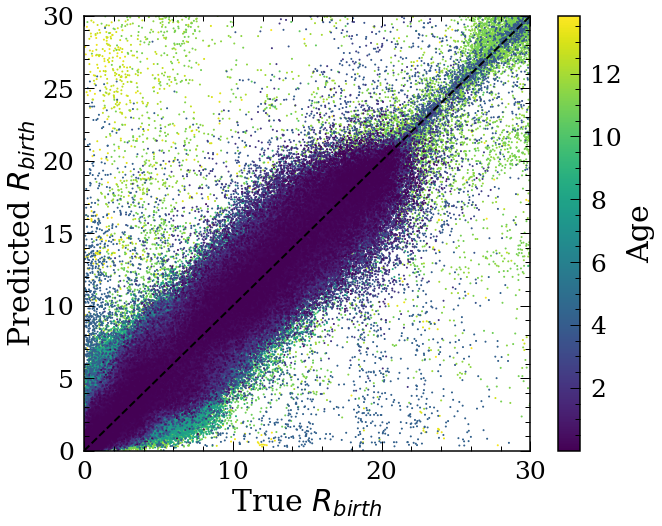

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(regr_outs['y_test'], regr_outs['prediction'], c=data_predict['age'],s=1)
plt.plot([0,30],[0,30],'k--')
plt.xlabel('True $R_{birth}$')
plt.ylabel('Predicted $R_{birth}$')
plt.xlim([0,30])
plt.ylim([0,30])
cbar = plt.colorbar()
cbar.set_label('Age',labelpad = 5)

# w/ radial cut

In [587]:
simNo='2_79e12'
z='0'
Rcut=True
select=False
Rcut_thread=30
zcut_thread=5


data=readsimdata(simNo,z,Rcut,select,Rcut_thread,zcut_thread)

## predict $R_{birth}$

In [588]:
regr, regr_outs = Astraea.RFregressor(data, ['feh_scale','age','ofe_scale'],
                                      target_var='R_bir', target_var_err='R_bir', n_estimators=3)

Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 3
Features attempt to train: ['feh_scale', 'age', 'ofe_scale']
ID column not found, using index as ID!
7528957 stars in dataframe!
7528957 total stars used for RF!
6023165 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.19209085642331347
Average chi^2 is: 0.7281689699496214
Finished!


In [589]:
data_predict=data.iloc[regr_outs['ID_test']]

(0.0, 0.5)

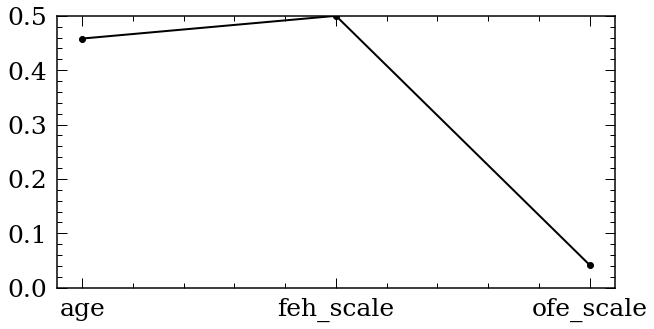

In [592]:
plt.figure(figsize=(10,5))
plt.plot(regr_outs['actrualF'],regr_outs['importance'],'ko-')
plt.ylim([0,0.5])

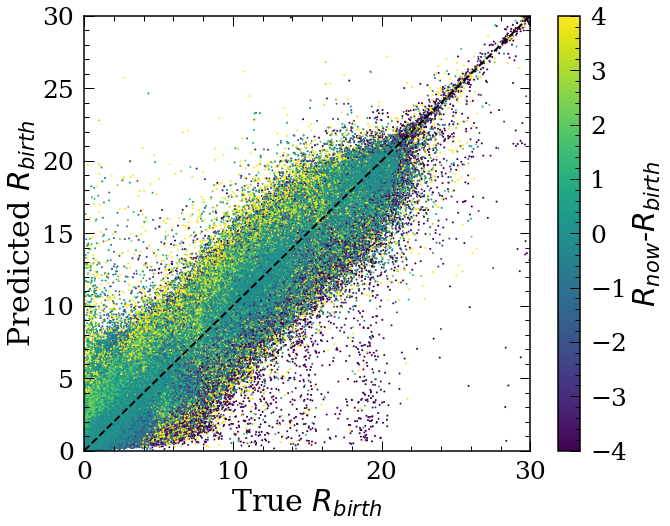

In [591]:
plt.figure(figsize=(10,8))
plt.scatter(regr_outs['y_test'], regr_outs['prediction'], c=(data_predict['R']-data_predict['R_bir']),s=1,
           vmin=-4,vmax=4)
plt.plot([0,30],[0,30],'k--')
plt.xlabel('True $R_{birth}$')
plt.ylabel('Predicted $R_{birth}$')
plt.xlim([0,30])
plt.ylim([0,30])
cbar = plt.colorbar()
cbar.set_label('$R_{now}$-$R_{birth}$',labelpad = 5)

## Predict $z_{birth}$

In [575]:
regr, regr_outs = Astraea.RFregressor(data, ['feh_scale','age','ofe_scale'],
                                      target_var='z_birth', target_var_err='z_birth', n_estimators=3)

Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 3
Features attempt to train: ['feh_scale', 'age', 'ofe_scale']
7528957 stars in dataframe!
7528957 total stars used for RF!
6023165 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: -0.04061790301095683
Average chi^2 is: 0.3739972006581559
Finished!


In [576]:
data_predict=data.iloc[regr_outs['ID_test']]

(0.0, 0.5)

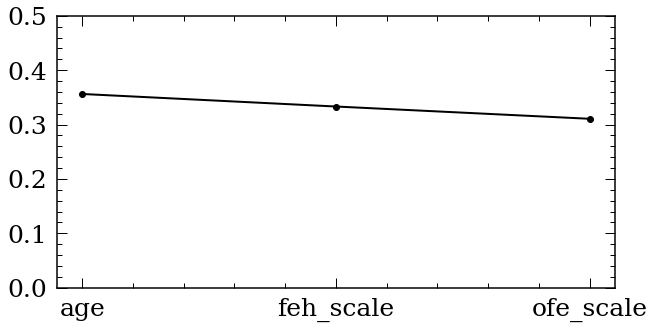

In [583]:
plt.figure(figsize=(10,5))
plt.plot(regr_outs['actrualF'],regr_outs['importance'],'ko-')
plt.ylim([0,0.5])

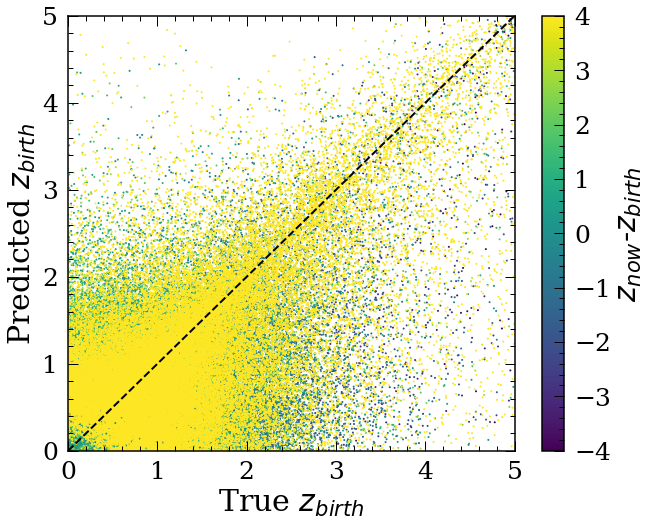

In [577]:
plt.figure(figsize=(10,8))
plt.scatter(regr_outs['y_test'], regr_outs['prediction'], c=(data_predict['R']-data_predict['z_birth']),s=1,
           vmin=-4,vmax=4)
plt.plot([0,5],[0,5],'k--')
plt.xlabel('True $z_{birth}$')
plt.ylabel('Predicted $z_{birth}$')
plt.xlim([0,5])
plt.ylim([0,5])
cbar = plt.colorbar()
cbar.set_label('$z_{now}$-$z_{birth}$',labelpad = 5)

# predict rbirth with Minchev 2018

## Get present day metallicity gradient and gradient with time in the Solar neighborhood

In [355]:
simNo='2_79e12'
z='0'
Rcut=True
select=False
Rcut_thread=15
zcut_thread=2


data=readsimdata(simNo,z,Rcut,select,Rcut_thread,zcut_thread)

In [356]:
len(data)

6980597

In [357]:
import random

SolarRad=8.2*(5./3.)

def getbin(x,y,binnumb=100):
    xbin=np.linspace(min(x),max(x),binnumb)
    x_bin=((max(x)-min(x))/binnumb)/2+xbin[:-1]
    y_bin=np.zeros(len(x_bin))
    for i in range(len(x_bin)):
        m=(x>xbin[i])&(x<xbin[i+1])
        y_bin[i]=np.median(y[m])
    return x_bin, y_bin
    

def get_SR(feh, x, y,xbir,ybir, radius=0.2*(5./3.), plotpoints=False):
    # radius: how big the solar circle is...
    
    # generate random location of the sun
    x_sun=random.uniform(-SolarRad, SolarRad)
    y_sun=np.sqrt(SolarRad**2.-x_sun**2.)*np.random.choice([-1,1])
    
    # get stars in the solar circle
    m=(((x-x_sun)**2.+(y-y_sun)**2.)<radius**2.)
    
    feh_sr, x_sr, y_sr = feh[m], xbir[m], ybir[m]
    
    r_sr=np.sqrt(x[m]**2. + y[m]**2.)
    
    if plotpoints:
        plt.figure()
        plt.plot(xbir,ybir,'k.',markersize=0.01,alpha=0.5)
        plt.plot(x_sr, y_sr,'r.',markersize=5)
        plt.xlabel('xbir')
        plt.ylabel('ybir')
        plt.legend()
        
    return feh_sr, r_sr, m


def calc_dfedr_SR(feh, r, plotpoints=False):
    r_bin, feh_bin = getbin(r, feh, binnumb=100)
    p = fitpoints(r_bin,feh_bin)
    if plotpoints:
        plt.figure()
        plt.plot(r_bin,feh_bin,'k.',markersize=5)
        plt.plot([min(r_bin),max(r_bin)],p([min(r_bin),max(r_bin)]),'r-',label='Gradient = %.4f'%(p[1]))
        plt.xlabel('R')
        plt.ylabel('[Fe/H]')
        plt.legend()
    return p[1]

-0.048244826530491336


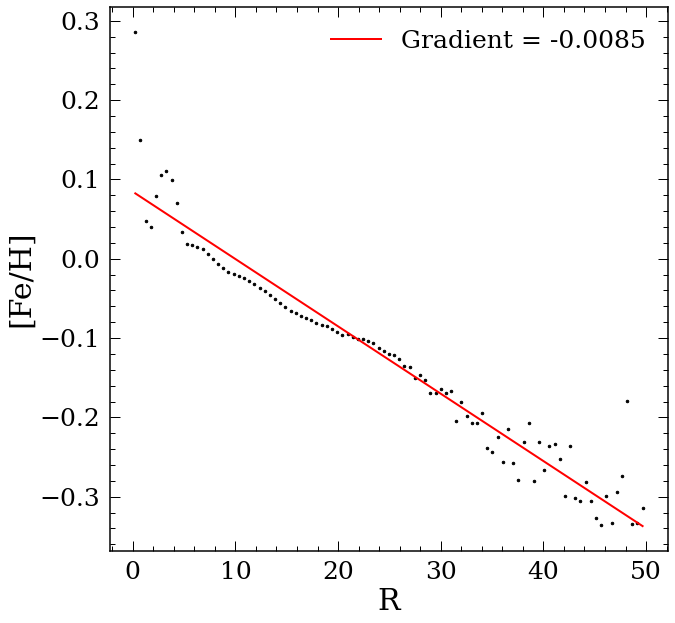

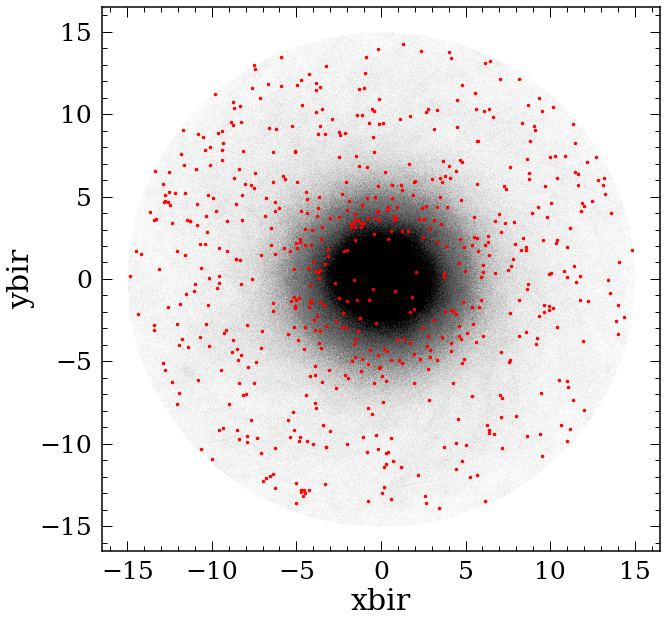

In [358]:
# present day metallicity gradient
p=calc_dfedr_SR(data['feh_scale'].values,data['R'].values,plotpoints=True)

# present day metallicity in the solar neighborhood
feh_sr, r_sr, m_sr = get_SR(data['feh_scale'].values, data['x'].values, data['y'].values,
                            data['x_birth'].values,data['y_birth'].values,plotpoints=True)


srm=(abs(data['R']-SolarRad)<0.2*(5./3.))
feh_p = np.median(data['feh_scale'][srm])
#feh_p = np.median(feh_sr)
print(feh_p)

## optimize with MCMC

In [360]:
currentt=0.05
slopet=0.05
slopenorm=3

def getfeh_sr(t):
    return currentt*np.log(14-t)-currentt*np.log(14)+feh_p

def getfeh_slope(t):
    return slopet*(math.log(15-t,slopenorm))+p-slopet*(math.log(15,slopenorm))

def getcolor(vrange,cm=plt.cm.get_cmap('viridis')):
    cmap = cm
    norm = matplotlib.colors.Normalize(vmin=min(vrange), vmax=max(vrange))
    return [cmap(norm(i)) for i in vrange]


Text(0, 0.5, '[O/Fe]')

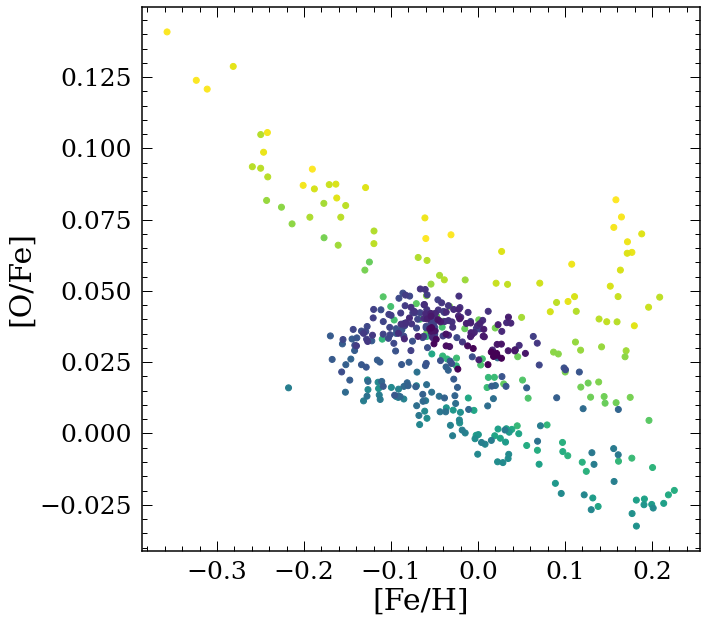

In [380]:
plt.scatter(feh_sr,data['ofe_scale'][m_sr],c=data['age'][m_sr])
plt.xlabel('[Fe/H]')
plt.ylabel('[O/Fe]')

In [377]:
m_sr=m_sr&(data['age']<8)
feh_sr,ages_sr=data['feh_scale'][m_sr].values,data['age'][m_sr].values
r_birth_true = data['R_bir'][m_sr].values


In [381]:
SolarRad=8.2*(5./3.)
# get relation
def getfeh_sr(t,currentt,logfeh):
    return currentt*math.log(14-t,logfeh)-currentt*math.log(14,logfeh)+feh_p

def getfeh_slope(t,slopet,logslope):
    return slopet*(math.log(15-t,logslope))+p-slopet*(math.log(15,logslope))

def feh_lookback(t,currentt,slopet,logfeh,logslope):
    m=getfeh_slope(t,currentt,logfeh)
    y=getfeh_sr(t,slopet,logslope)
    b=y-m*SolarRad
    return m, b



# optimize
def fun_rosenbrock(feh,age,currentt,slopet,logfeh,logslope):
    rbirth_inf=np.zeros(len(feh))
    for iii in range(len(age)):
        m, b = feh_lookback(age[iii],currentt,slopet,logfeh,logslope)
        rbirth_inf[iii] = (feh[iii]-b)/m
    return rbirth_inf


def log_likelihood(theta, feh, age, r_birth_true):
    currentt,slopet,logfeh,logslope = theta
    model = fun_rosenbrock(feh,age,currentt,slopet,logfeh,logslope)
    return -0.5 * sum(((r_birth_true - model)** 2)/r_birth_true )
                         
                         
def log_prior(theta):
    currentt,slopet,logfeh,logslope = theta
    if 0 < currentt < 100 and 0 < slopet < 4 and 0 < logfeh < 100 and 0 < logslope < 20:
        return 0.0
    return -np.inf

                         
def log_probability(theta, feh, age, r_birth_true):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, feh, age, r_birth_true)
                         
                         
import emcee

pos = (0.1,0.1,3,3) + 1e-3 * np.random.randn(200, 4)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(feh_sr, ages_sr, r_birth_true)
)
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [16:57<00:00,  4.91it/s]


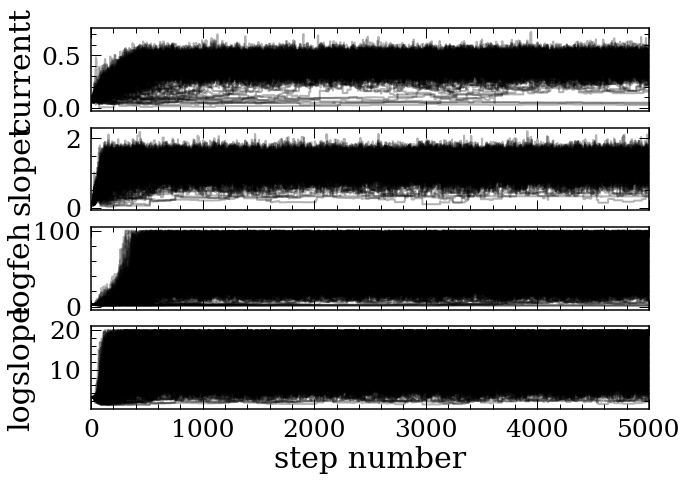

In [382]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ['currentt','slopet','logfeh','logslope']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

(65200, 4)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

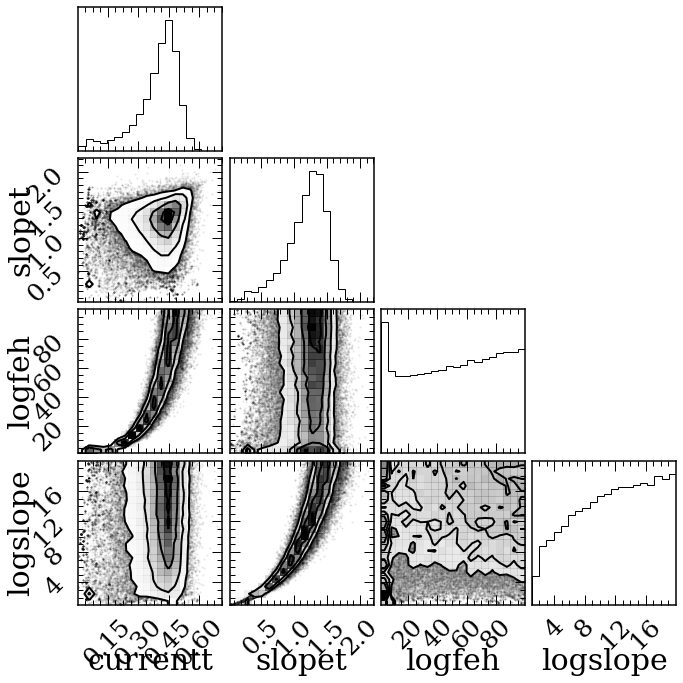

In [384]:
import corner
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)
fig = corner.corner(
    flat_samples, labels=labels
);

from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

## See the best optimization

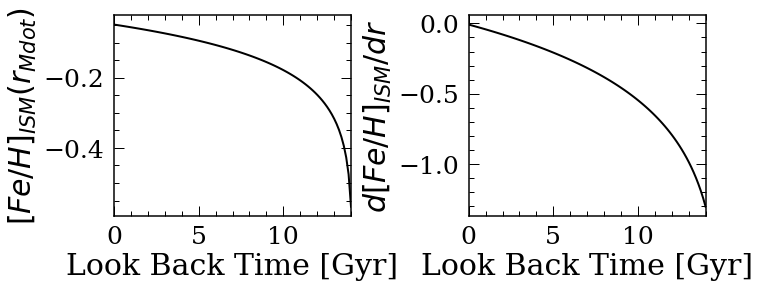

In [385]:
currentt=np.percentile(flat_samples[:, 0], [16, 50, 84])[1]
slopet=np.percentile(flat_samples[:, 1], [16, 50, 84])[1]
logfeh=np.percentile(flat_samples[:, 2], [16, 50, 84])[1]
logslope=np.percentile(flat_samples[:, 3], [16, 50, 84])[1]
#currentt,slopet,logfeh,logslope=0.1,0.1,3,3
slopenorm=3

def getfeh_sr(t,currentt,logfeh):
    return currentt*math.log(14-t,logfeh)-currentt*math.log(14,logfeh)+feh_p

def getfeh_slope(t,slopet,logslope):
    return slopet*(math.log(15-t,logslope))+p-slopet*(math.log(15,logslope))


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(np.linspace(0,14,100),np.array([getfeh_sr(i,currentt,logfeh) for i in np.linspace(0,13.9,100)]),'k-')
plt.xlabel('Look Back Time [Gyr]')
plt.ylabel('$[Fe/H]_{ISM}(r_{Mdot})$')
plt.xlim([0,14])

plt.subplot(1,2,2)
plt.plot(np.linspace(0,14,100),np.array([getfeh_slope(i,slopet,logslope) for i in np.linspace(0,13.9,100)]),'k-')
plt.xlabel('Look Back Time [Gyr]')
plt.ylabel('$d[Fe/H]_{ISM}/dr$')
plt.tight_layout()
plt.xlim([0,14])
plt.tight_layout()

-144.27359262581018
109.19512438310267


/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice

(14.0, 0.0)

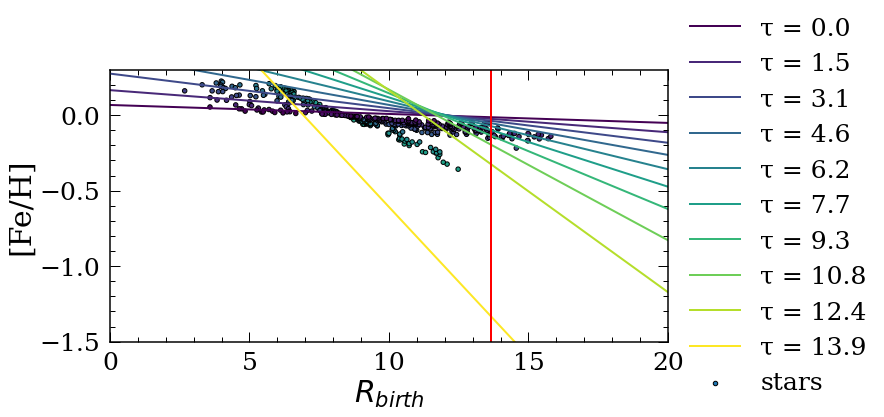

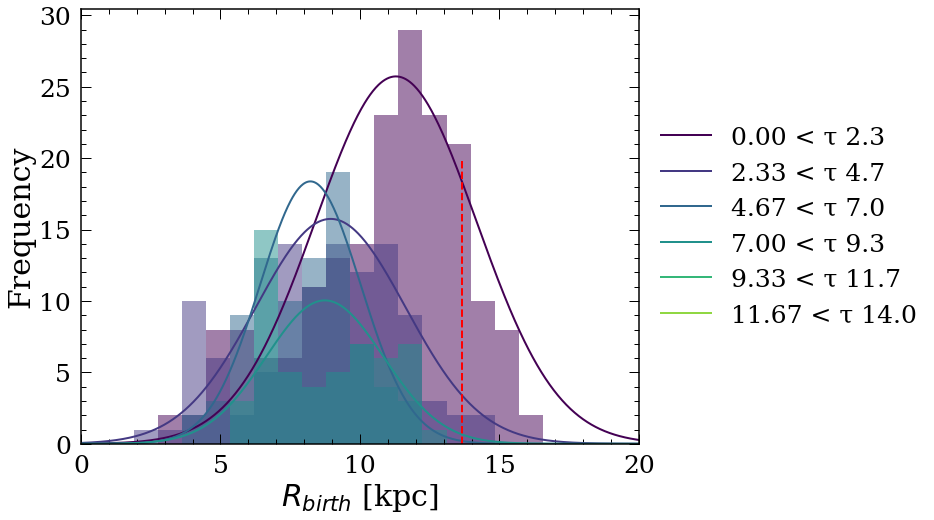

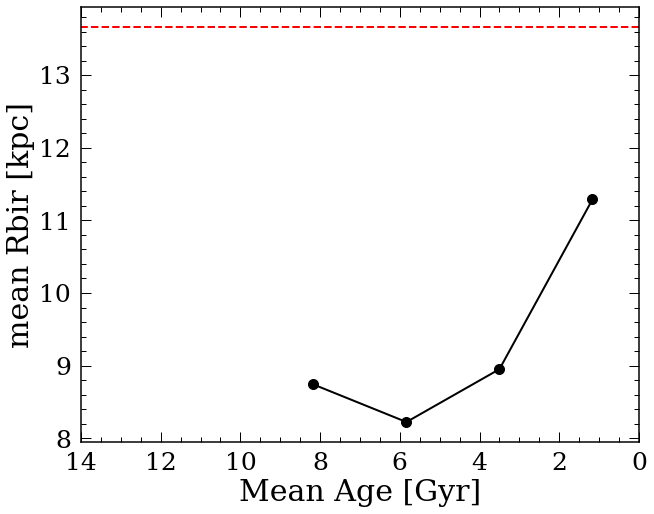

In [386]:
currentt=np.percentile(flat_samples[:, 0], [16, 50, 84])[1]
slopet=np.percentile(flat_samples[:, 1], [16, 50, 84])[1]
logfeh=np.percentile(flat_samples[:, 2], [16, 50, 84])[1]
logslope=np.percentile(flat_samples[:, 3], [16, 50, 84])[1]
#currentt,slopet,logfeh,logslope=0.1,0.1,3,3
slopenorm=3

def getfeh_sr(t,currentt,logfeh):
    return currentt*math.log(14-t,logfeh)-currentt*math.log(14,logfeh)+feh_p

def getfeh_slope(t,slopet,logslope):
    return slopet*(math.log(15-t,logslope))+p-slopet*(math.log(15,logslope))

def getcolor(vrange,cm=plt.cm.get_cmap('viridis')):
    cmap = cm
    norm = matplotlib.colors.Normalize(vmin=min(vrange), vmax=max(vrange))
    return [cmap(norm(i)) for i in vrange]

binnumb=10d
colors_feh = getcolor(np.linspace(0,13.9,binnumb))

# put stars back into their birth raii
ages_sr = data['age'].values[m_sr]
rbirth_inf = np.zeros(len(ages_sr))

for i in range(len(ages_sr)):
    # get relation
    m, b = feh_lookback(ages_sr[i],currentt,slopet,logfeh,logslope)
    rbirth_inf[i] = (feh_sr[i]-b)/m
    

print(log_probability([currentt,slopet,logfeh,logslope], feh_sr, ages_sr, r_birth_true))
print(sum(((rbirth_inf-r_birth_true)/r_birth_true)**2))


SolarRad=8.2*(5./3.)
# see what the results are
plt.figure(figsize=(10,5))
for count, i in enumerate(np.linspace(0,13.9,binnumb)):
    m, b = feh_lookback(i,currentt,slopet,logfeh,logslope)
    plt.plot(np.linspace(0,20,10),m*(np.linspace(0,14,10))+b,label='τ = %.1f'%i,c = colors_feh[count])
plt.plot([SolarRad, SolarRad],[-1.5, 0.3], 'r-')
plt.xlabel('$R_{birth}$')
plt.ylabel('[Fe/H]')
plt.xlim([0,20])
plt.ylim([-1.5,0.3])

plt.scatter(rbirth_inf, feh_sr, s=20, c=ages_sr, edgecolors='k', label='stars',vmin=0, vmax=13.9)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    

import seaborn as sns
# historgram of mono-age population
plt.figure(figsize=(10,8))
agebin=np.linspace(0,14,7)
colors_feh = getcolor(agebin)

meanrbirth = np.zeros(6)
for i in range(len(agebin)-1):
    
    m=(ages_sr>=agebin[i])&(ages_sr<=agebin[i+1])
    """
    sns.kdeplot(rbirth_inf[m], color=colors_feh[i],
                 label='%.2f < τ %.1f'%(agebin[i], agebin[i+1]),
                 alpha=0.5,fill=True)
    
    """
    plt.hist(rbirth_inf[m], color=colors_feh[i], bins=np.linspace(-5,20,30), alpha=0.5)
    meanrbirth[i]=np.median(rbirth_inf[m])
    gausd=sum(m)/(np.std(rbirth_inf[m]) * np.sqrt(2 * np.pi)) * np.exp( - (np.linspace(-5,20,1000) - np.median(rbirth_inf[m]))**2 / (2 * np.std(rbirth_inf[m])**2))
    plt.plot(np.linspace(-5,20,1000), gausd, color=colors_feh[i], label='%.2f < τ %.1f'%(agebin[i], agebin[i+1]))
    #plt.plot([np.mean(rbirth_inf[m]),np.mean(rbirth_inf[m])],[0,50],color=colors_feh[i])
plt.plot([SolarRad,SolarRad],[0,20],'r--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('$R_{birth}$ [kpc]')
plt.ylabel('Frequency')
plt.xlim([0,20])


plt.figure(figsize=(10,8))
plt.plot((agebin[:-1]+np.diff(agebin)[0]/2),meanrbirth,'ko-',markersize=10)
plt.plot([0,14],[SolarRad,SolarRad],'r--')
plt.xlabel('Mean Age [Gyr]')
plt.ylabel('mean Rbir [kpc]')
plt.xlim([14,0])

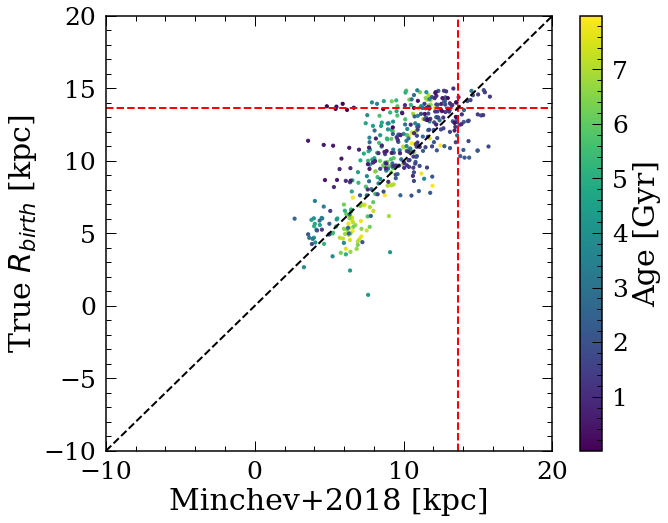

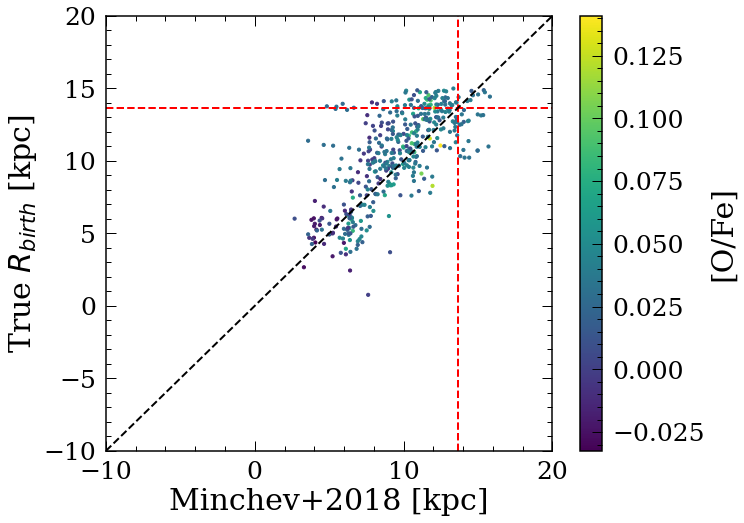

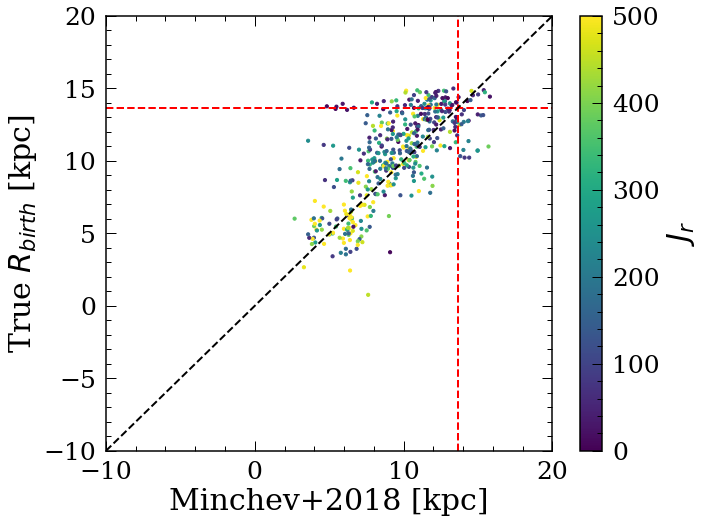

In [387]:
r_birth_true = data['R_bir'].values[m_sr]
# compare with true R_birth
plt.figure(figsize=(10,8))
plt.scatter(rbirth_inf, r_birth_true, s=10, c = ages_sr)
plt.plot([SolarRad,SolarRad],[-10,20],'r--')
plt.plot([-10,20],[SolarRad,SolarRad],'r--')
plt.plot([-10,20],[-10,20],'k--')
plt.xlim([-10,20])
plt.ylim([-10,20])
plt.xlabel('Minchev+2018 [kpc]')
plt.ylabel('True $R_{birth}$ [kpc]')
cbar = plt.colorbar()
cbar.set_label('Age [Gyr]',labelpad = 5)

# compare with true R_birth
plt.figure(figsize=(10,8))
plt.scatter(rbirth_inf, r_birth_true, s=10, c = data['ofe_scale'][m_sr])
plt.plot([SolarRad,SolarRad],[-10,20],'r--')
plt.plot([-10,20],[SolarRad,SolarRad],'r--')
plt.plot([-10,20],[-10,20],'k--')
plt.xlim([-10,20])
plt.ylim([-10,20])
plt.xlabel('Minchev+2018 [kpc]')
plt.ylabel('True $R_{birth}$ [kpc]')
cbar = plt.colorbar()
cbar.set_label('[O/Fe]',labelpad = 5)


# compare with true R_birth
plt.figure(figsize=(10,8))
plt.scatter(rbirth_inf, r_birth_true, s=10, c = data['Jr'][m_sr],vmin=0,vmax=500)
plt.plot([SolarRad,SolarRad],[-10,20],'r--')
plt.plot([-10,20],[SolarRad,SolarRad],'r--')
plt.plot([-10,20],[-10,20],'k--')
plt.xlim([-10,20])
plt.ylim([-10,20])
plt.xlabel('Minchev+2018 [kpc]')
plt.ylabel('True $R_{birth}$ [kpc]')
cbar = plt.colorbar()
cbar.set_label('$J_r$',labelpad = 5)

## How well does it do for stars outside of the solar neighboorhood

In [388]:

binnumb=10
colors_feh = getcolor(np.linspace(0,13.9,binnumb))

    
# put stars back into their birth raii
ages = data['age']
fehs = data['feh_scale']
rbirth_inf = np.zeros(len(ages))

for i in trange(len(ages)):
    # get relation
    m, b = feh_lookback(ages[i],currentt,slopet,logfeh,logslope)
    rbirth_inf[i] = (fehs[i]-b)/m

100%|██████████| 6980597/6980597 [00:49<00:00, 140367.29it/s]


Text(0, 0.5, 'Frequency')

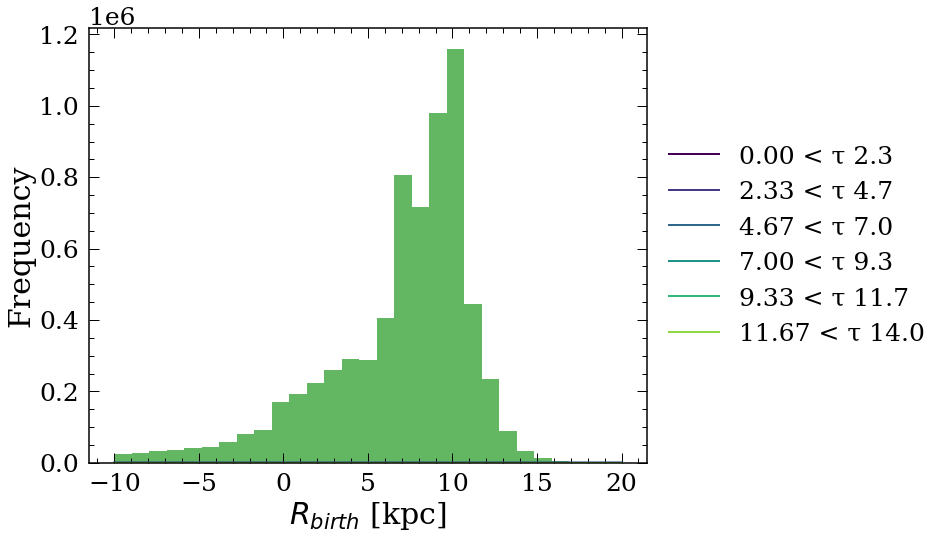

In [389]:
import seaborn as sns
# historgram of mono-age population
plt.figure(figsize=(10,8))
agebin=np.linspace(0,14,7)
colors_feh = getcolor(agebin)

for i in range(len(agebin)-1):
    
    m=(ages_sr>=agebin[i])&(ages_sr<=agebin[i+1])
    """
    sns.kdeplot(rbirth_inf[m], color=colors_feh[i],
                 label='%.2f < τ %.1f'%(agebin[i], agebin[i+1]),
                 alpha=0.5,fill=True)
    
    """
    plt.hist(rbirth_inf, color=colors_feh[i], bins=np.linspace(-10,20,30), alpha=0.5)
    
    gausd=sum(m)/(np.std(rbirth_inf) * np.sqrt(2 * np.pi)) * np.exp( - (np.linspace(-10,20,30) - np.mean(rbirth_inf))**2 / (2 * np.std(rbirth_inf)**2))
    plt.plot(np.linspace(-10,20,30), gausd, color=colors_feh[i], label='%.2f < τ %.1f'%(agebin[i], agebin[i+1]))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('$R_{birth}$ [kpc]')
plt.ylabel('Frequency')

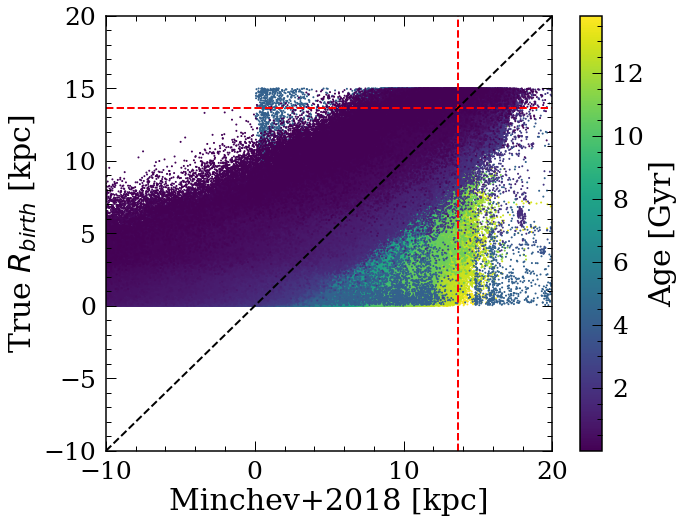

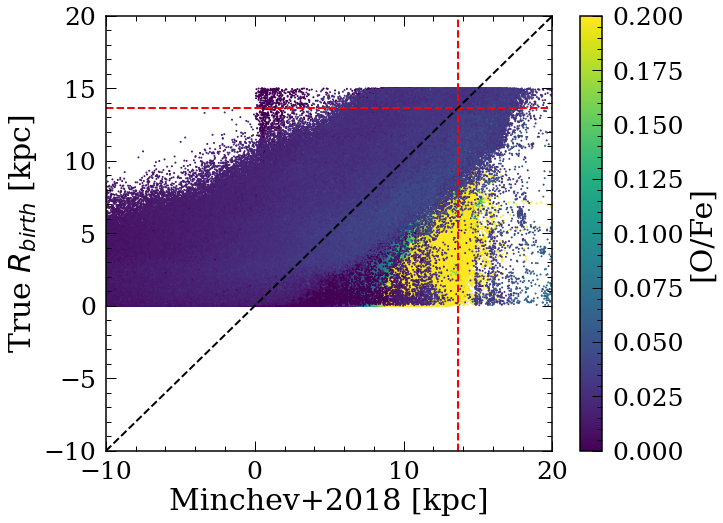

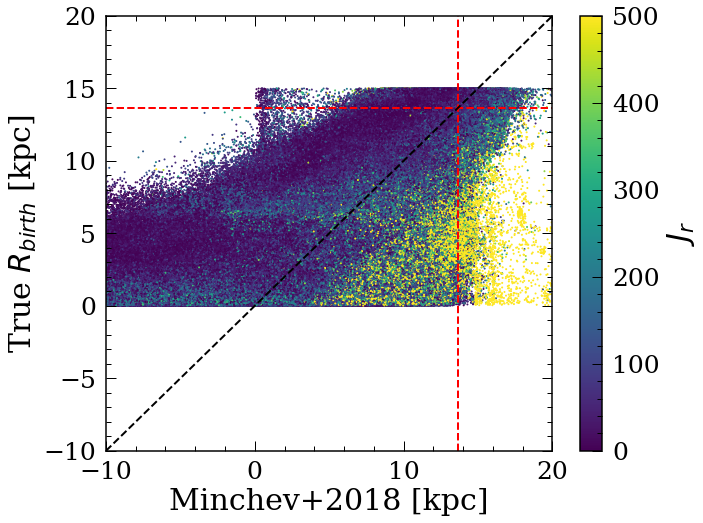

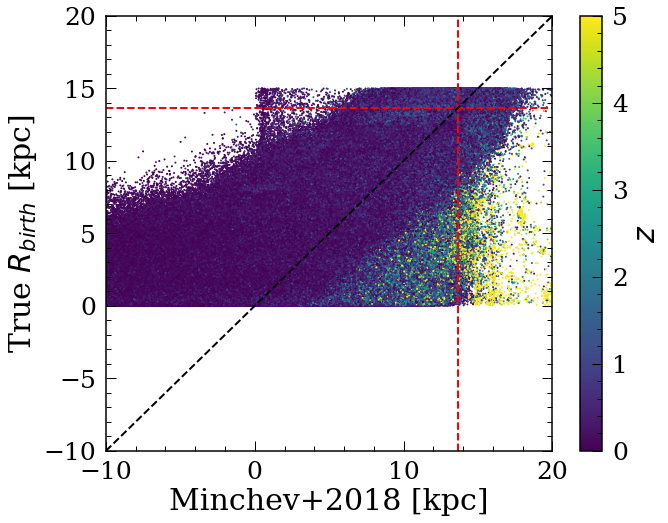

In [390]:
r_birth_true = data['R_bir']
# compare with true R_birth
plt.figure(figsize=(10,8))
plt.scatter(rbirth_inf, r_birth_true, s=1, c = ages)
plt.plot([SolarRad,SolarRad],[-10,20],'r--')
plt.plot([-10,20],[SolarRad,SolarRad],'r--')
plt.plot([-10,20],[-10,20],'k--')
plt.xlim([-10,20])
plt.ylim([-10,20])
plt.xlabel('Minchev+2018 [kpc]')
plt.ylabel('True $R_{birth}$ [kpc]')
cbar = plt.colorbar()
cbar.set_label('Age [Gyr]',labelpad = 5)

# compare with true R_birth
plt.figure(figsize=(10,8))
plt.scatter(rbirth_inf, r_birth_true, s=1, c = data['ofe_scale'],vmin=-0,vmax=0.2)
plt.plot([SolarRad,SolarRad],[-10,20],'r--')
plt.plot([-10,20],[SolarRad,SolarRad],'r--')
plt.plot([-10,20],[-10,20],'k--')
plt.xlim([-10,20])
plt.ylim([-10,20])
plt.xlabel('Minchev+2018 [kpc]')
plt.ylabel('True $R_{birth}$ [kpc]')
cbar = plt.colorbar()
cbar.set_label('[O/Fe]',labelpad = 5)


# compare with true R_birth
plt.figure(figsize=(10,8))
plt.scatter(rbirth_inf, r_birth_true, s=1, c = data['Jr'],vmin=0,vmax=500)
plt.plot([SolarRad,SolarRad],[-10,20],'r--')
plt.plot([-10,20],[SolarRad,SolarRad],'r--')
plt.plot([-10,20],[-10,20],'k--')
plt.xlim([-10,20])
plt.ylim([-10,20])
plt.xlabel('Minchev+2018 [kpc]')
plt.ylabel('True $R_{birth}$ [kpc]')
cbar = plt.colorbar()
cbar.set_label('$J_r$',labelpad = 5)

# compare with true R_birth
plt.figure(figsize=(10,8))
plt.scatter(rbirth_inf, r_birth_true, s=1, c = abs(data['z']),vmin=0,vmax=5)
plt.plot([SolarRad,SolarRad],[-10,20],'r--')
plt.plot([-10,20],[SolarRad,SolarRad],'r--')
plt.plot([-10,20],[-10,20],'k--')
plt.xlim([-10,20])
plt.ylim([-10,20])
plt.xlabel('Minchev+2018 [kpc]')
plt.ylabel('True $R_{birth}$ [kpc]')
cbar = plt.colorbar()
cbar.set_label('$z$',labelpad = 5)

100%|██████████| 9/9 [00:00<00:00, 53.12it/s]


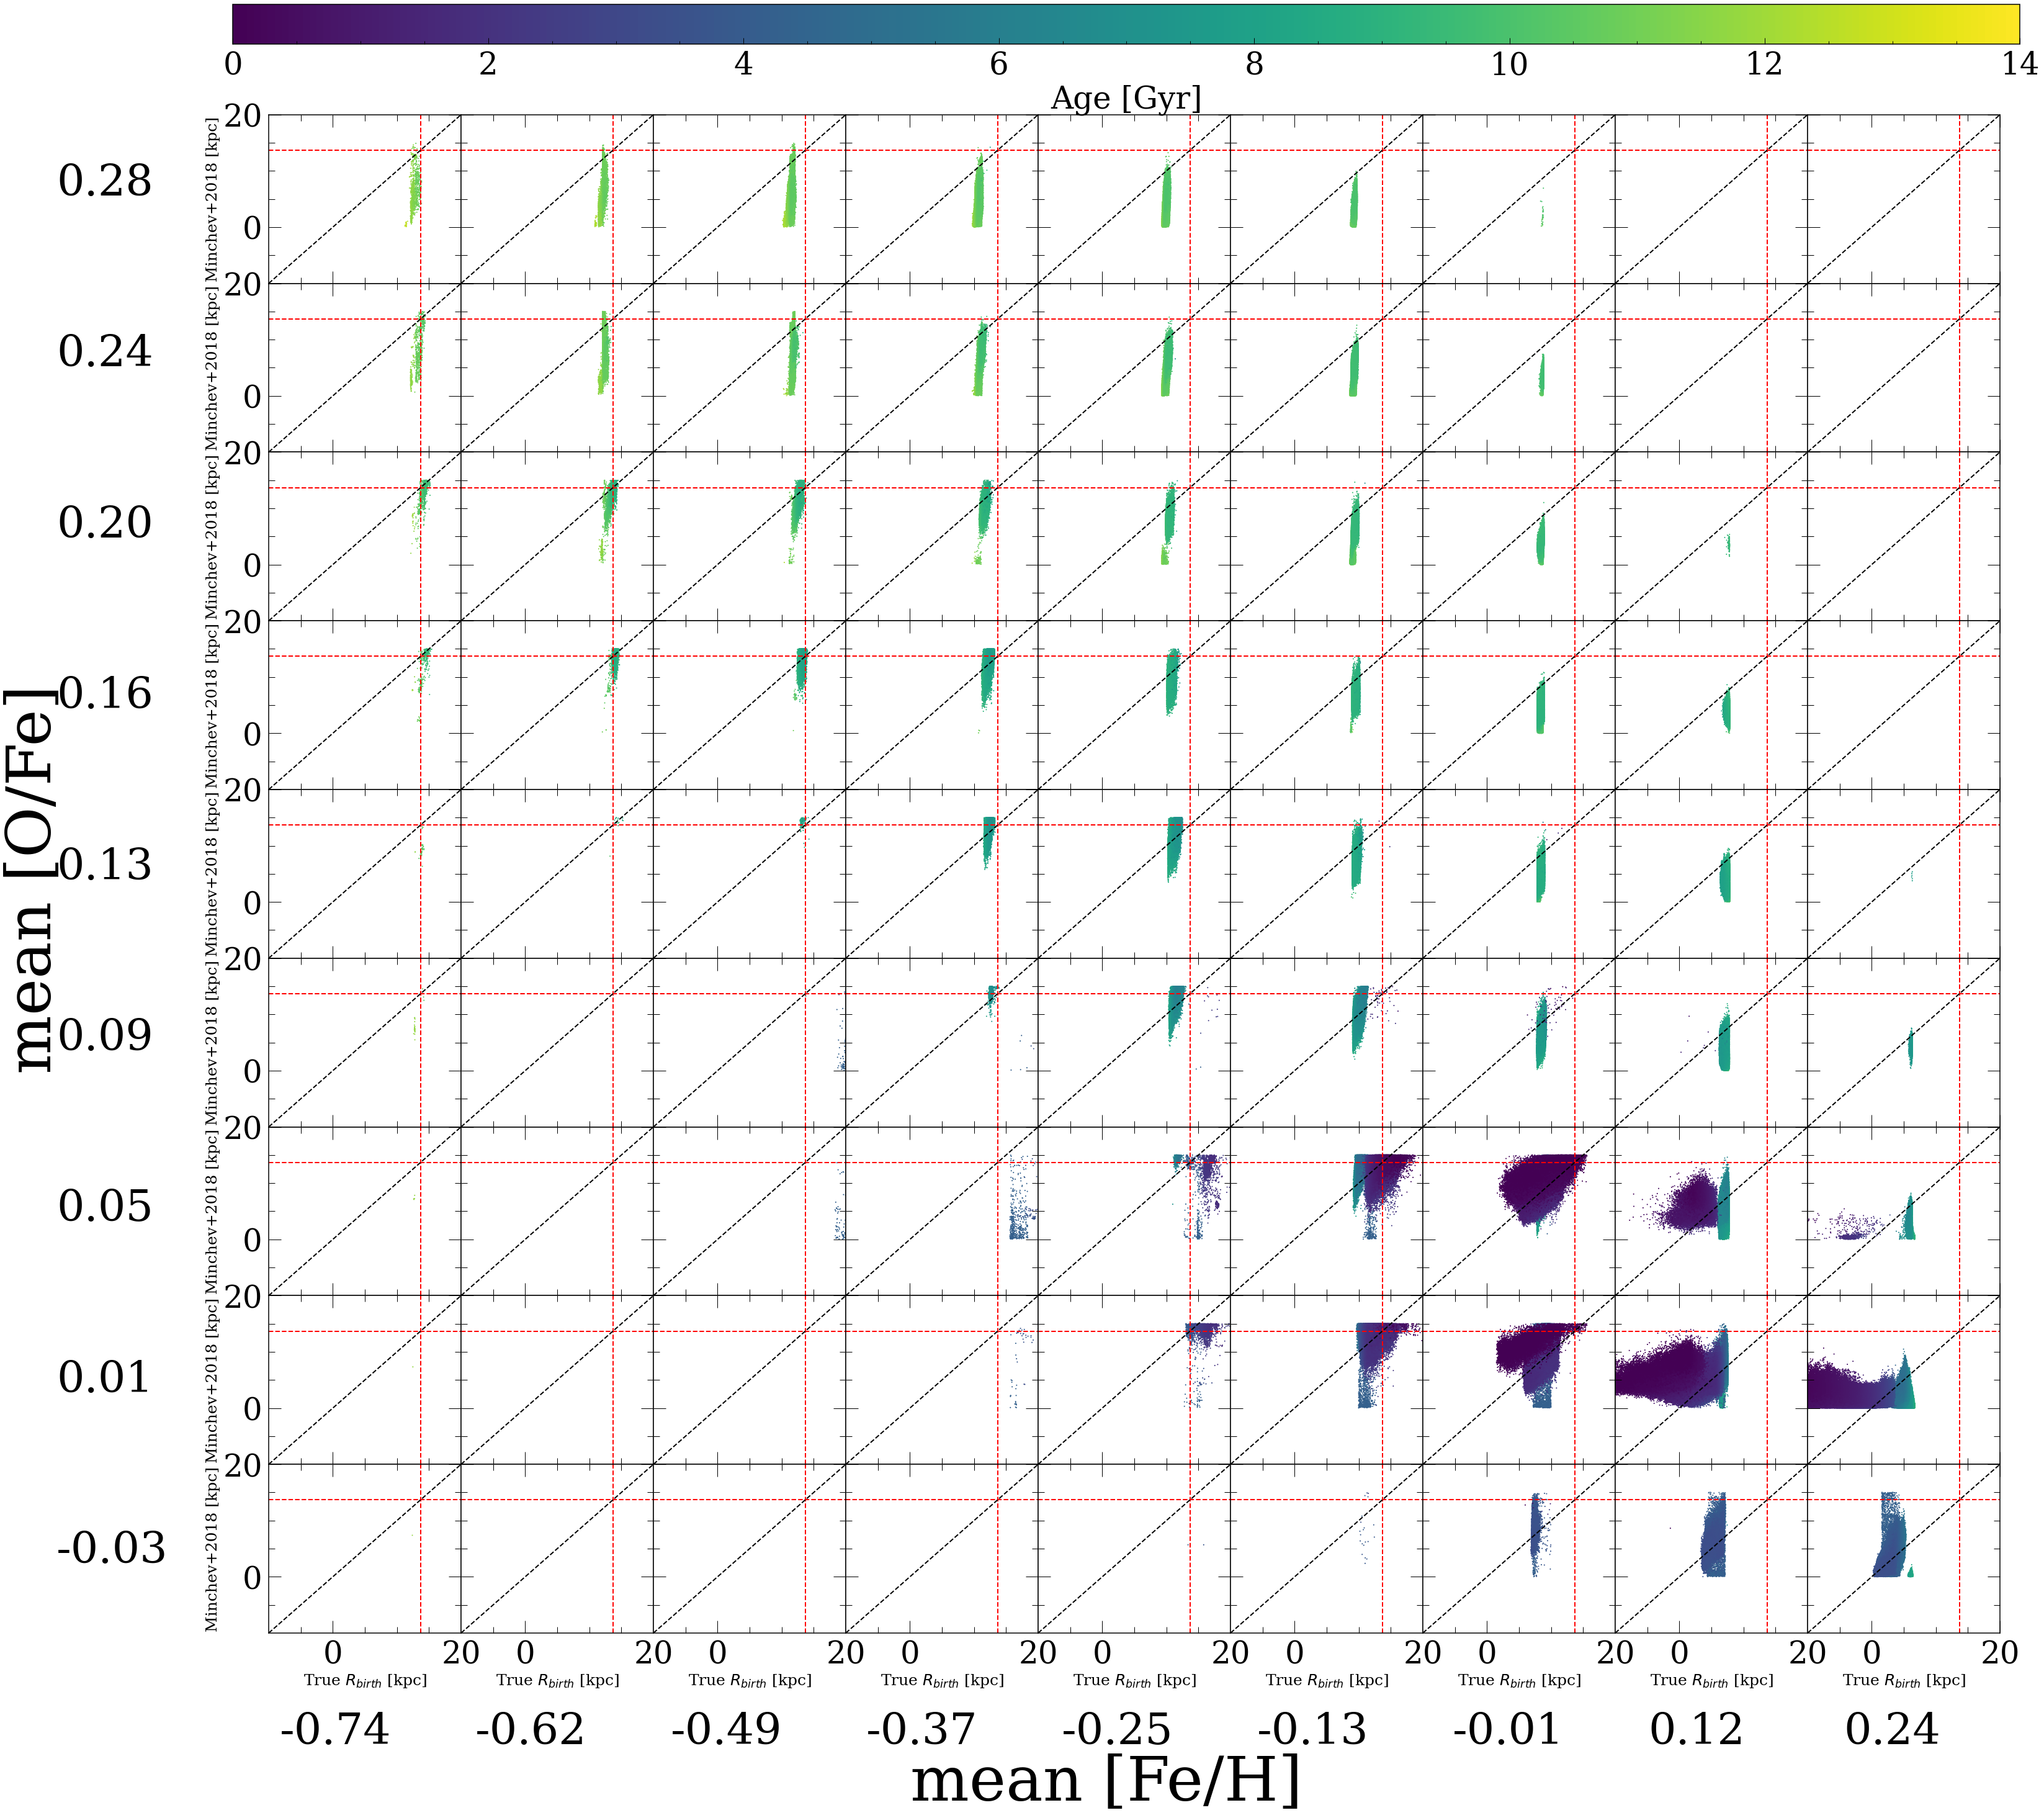

In [392]:
from scipy.ndimage import gaussian_filter
import math
from matplotlib import rc
rc('text', usetex=False) 
Febin=np.linspace(-0.8,0.3,10)
alpha=np.linspace(0.3,-0.05,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40



fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0


for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=(data['ofe_scale']>alpha[i+1])
    df_all=df_all&(data['ofe_scale']<alpha[i])
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all&(data['feh_scale']>Febin[j])
        df_all_z=df_all_z&(data['feh_scale']<Febin[j+1])
        
        
        
        im=axarr[i,j].scatter(rbirth_inf[df_all_z], r_birth_true[df_all_z], s=1, c = ages[df_all_z],vmin=0,vmax=14)
        axarr[i,j].plot([SolarRad,SolarRad],[-10,20],'r--')
        axarr[i,j].plot([-10,20],[SolarRad,SolarRad],'r--')
        axarr[i,j].plot([-10,20],[-10,20],'k--')
        axarr[i,j].set_xlim([-10,20])
        axarr[i,j].set_ylim([-10,20])
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        count=count+1
        if j!=0:
            axarr[i,j].set_yticklabels([])
        else:
            axarr[i,j].set_ylabel('Minchev+2018 [kpc]',fontsize=25) 
        if i!=len(alpha)-2:
            axarr[i,j].set_xticklabels([])
        else:
            axarr[i,j].set_xlabel('True $R_{birth}$ [kpc]',fontsize=25) 

        axarr[i,j].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
        axarr[i,j].tick_params(which='minor', length=10, direction='in',top=True,right=True)

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [O/Fe]', ha='center', va='center', rotation='vertical',fontsize=100)
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100)

    
for i in range(0,10-1):
    fig.text(0.03, 0.16+0.085*i, '%.2f'%((0.3-alpha[i]-0.05+0.3-alpha[i+1]-0.05)/2.), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)






In [393]:
rbirth_inf_feh=rbirth_inf

# Do the same with [O/Fe]

0.0426813432439401


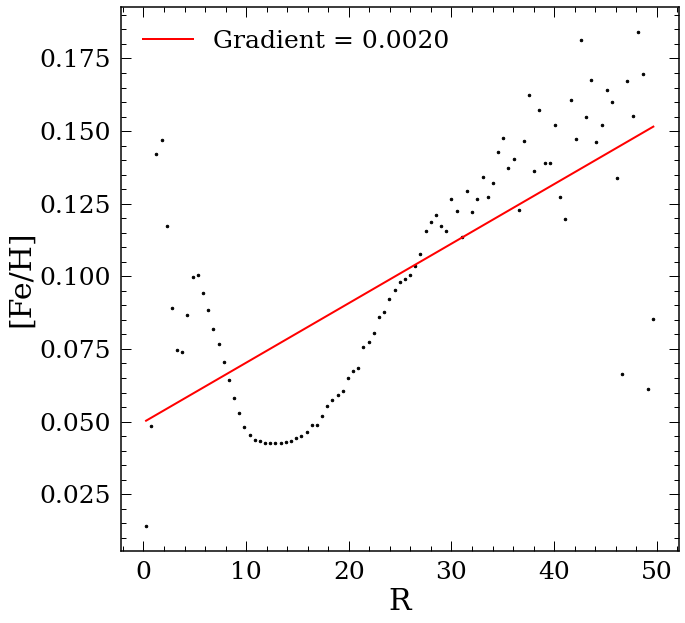

In [394]:
# present day metallicity gradient
p=calc_dfedr_SR(data['ofe_scale'].values,data['R'].values,plotpoints=True)


srm=(abs(data['R']-SolarRad)<0.2*(5./3.))
feh_p = np.median(data['ofe_scale'][srm])
print(feh_p)

In [396]:
m_sr=m_sr&(data['age']<8)
feh_sr,ages_sr=data['feh_scale'][m_sr].values,data['age'][m_sr].values
r_birth_true = data['R_bir'][m_sr].values



In [397]:
SolarRad=8.2*(5./3.)
# get relation
def getfeh_sr(t,currentt,logfeh):
    return currentt*math.log(14-t,logfeh)-currentt*math.log(14,logfeh)+feh_p

def getfeh_slope(t,slopet,logslope):
    return slopet*(math.log(15-t,logslope))+p-slopet*(math.log(15,logslope))

def feh_lookback(t,currentt,slopet,logfeh,logslope):
    m=getfeh_slope(t,currentt,logfeh)
    y=getfeh_sr(t,slopet,logslope)
    b=y-m*SolarRad
    return m, b



# optimize
def fun_rosenbrock(feh,age,currentt,slopet,logfeh,logslope):
    rbirth_inf=np.zeros(len(feh))
    for iii in range(len(age)):
        m, b = feh_lookback(age[iii],currentt,slopet,logfeh,logslope)
        rbirth_inf[iii] = (feh[iii]-b)/m
    return rbirth_inf


def log_likelihood(theta, feh, age, r_birth_true):
    currentt,slopet,logfeh,logslope = theta
    model = fun_rosenbrock(feh,age,currentt,slopet,logfeh,logslope)
    return -0.5 * sum(((r_birth_true - model)** 2)/r_birth_true )
                         
                         
def log_prior(theta):
    currentt,slopet,logfeh,logslope = theta
    if 0 < currentt < 100 and 0 < slopet < 4 and 0 < logfeh < 100 and 0 < logslope < 20:
        return 0.0
    return -np.inf

                         
def log_probability(theta, feh, age, r_birth_true):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, feh, age, r_birth_true)
                         
                         
import emcee

pos = (0.1,0.1,3,3) + 1e-3 * np.random.randn(200, 4)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(feh_sr, ages_sr, r_birth_true)
)
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [16:38<00:00,  5.01it/s]


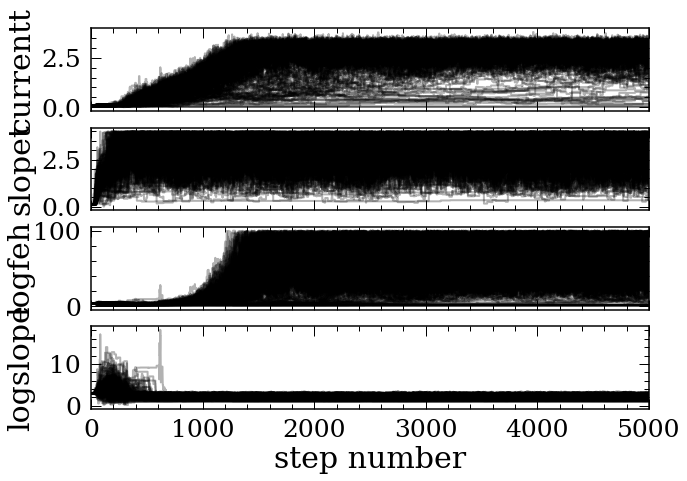

In [398]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ['currentt','slopet','logfeh','logslope']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

(65200, 4)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

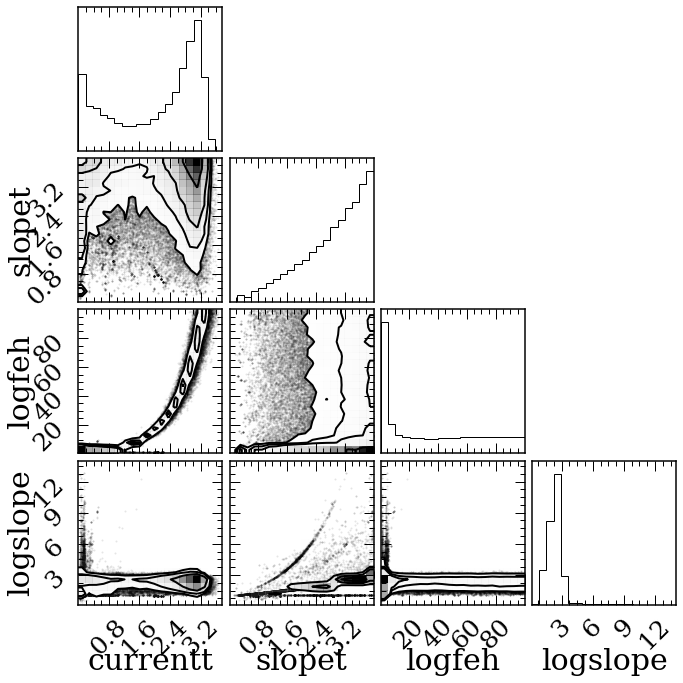

In [403]:
import corner
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)
fig = corner.corner(
    flat_samples, labels=labels
);

from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

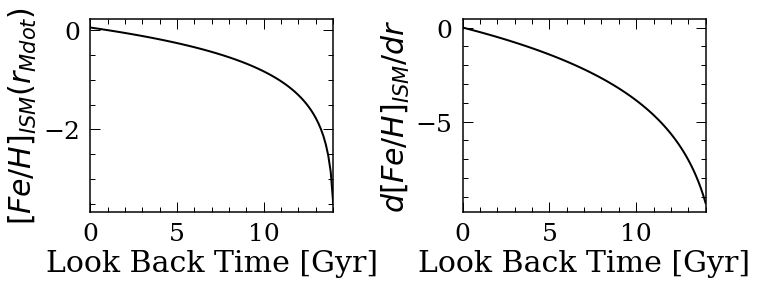

In [404]:
currentt=np.percentile(flat_samples[:, 0], [16, 50, 84])[1]
slopet=np.percentile(flat_samples[:, 1], [16, 50, 84])[1]
logfeh=np.percentile(flat_samples[:, 2], [16, 50, 84])[1]
logslope=np.percentile(flat_samples[:, 3], [16, 50, 84])[1]
#currentt,slopet,logfeh,logslope=0.1,0.1,3,3
slopenorm=3

def getfeh_sr(t,currentt,logfeh):
    return currentt*math.log(14-t,logfeh)-currentt*math.log(14,logfeh)+feh_p

def getfeh_slope(t,slopet,logslope):
    return slopet*(math.log(15-t,logslope))+p-slopet*(math.log(15,logslope))


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(np.linspace(0,14,100),np.array([getfeh_sr(i,currentt,logfeh) for i in np.linspace(0,13.9,100)]),'k-')
plt.xlabel('Look Back Time [Gyr]')
plt.ylabel('$[Fe/H]_{ISM}(r_{Mdot})$')
plt.xlim([0,14])

plt.subplot(1,2,2)
plt.plot(np.linspace(0,14,100),np.array([getfeh_slope(i,slopet,logslope) for i in np.linspace(0,13.9,100)]),'k-')
plt.xlabel('Look Back Time [Gyr]')
plt.ylabel('$d[Fe/H]_{ISM}/dr$')
plt.tight_layout()
plt.xlim([0,14])
plt.tight_layout()

-359.6878365476136
168.852140664126


/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice

(14.0, 0.0)

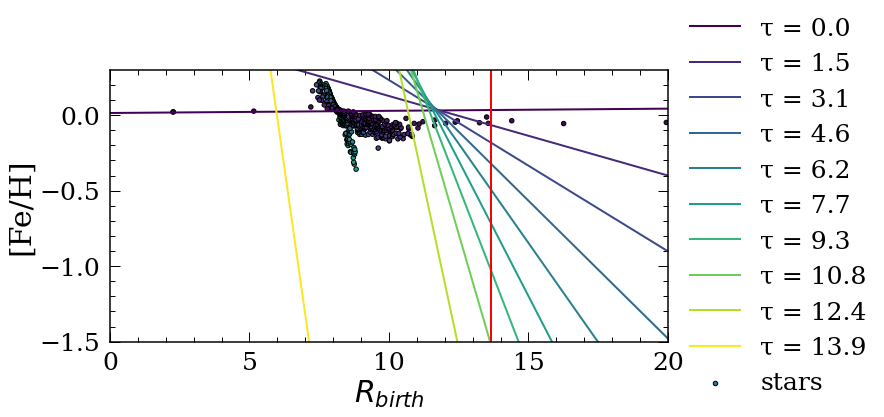

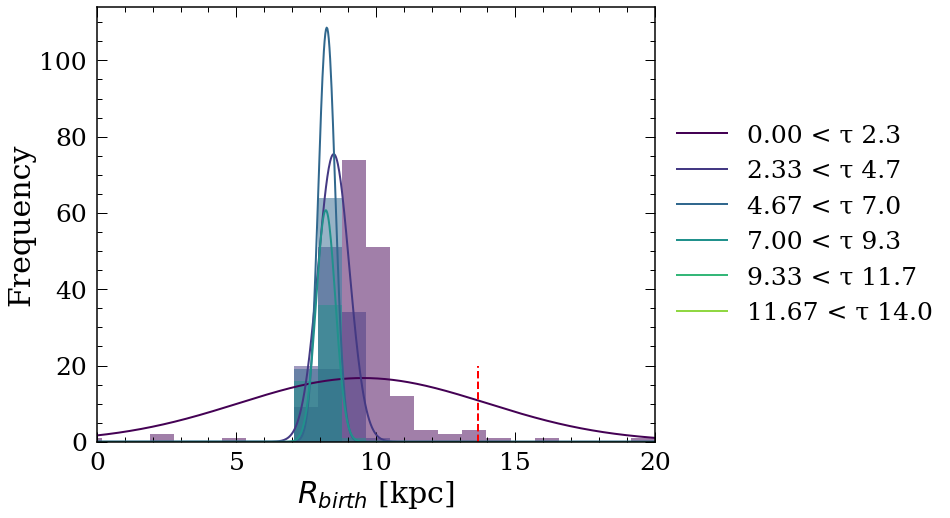

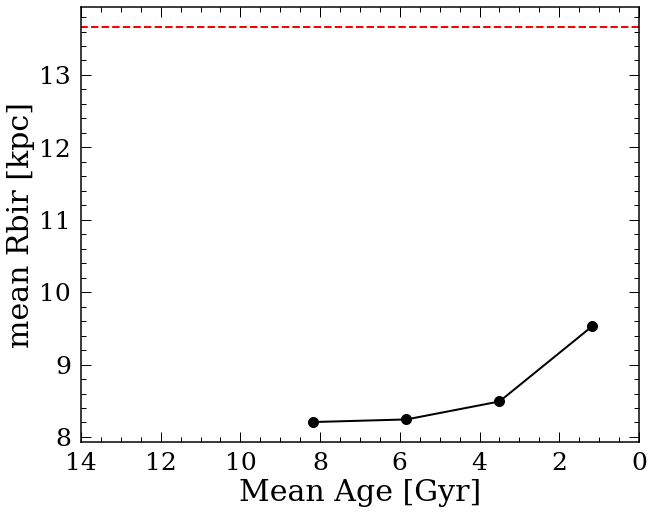

In [405]:
currentt=np.percentile(flat_samples[:, 0], [16, 50, 84])[1]
slopet=np.percentile(flat_samples[:, 1], [16, 50, 84])[1]
logfeh=np.percentile(flat_samples[:, 2], [16, 50, 84])[1]
logslope=np.percentile(flat_samples[:, 3], [16, 50, 84])[1]
#currentt,slopet,logfeh,logslope=0.1,0.1,3,3
slopenorm=3

def getfeh_sr(t,currentt,logfeh):
    return currentt*math.log(14-t,logfeh)-currentt*math.log(14,logfeh)+feh_p

def getfeh_slope(t,slopet,logslope):
    return slopet*(math.log(15-t,logslope))+p-slopet*(math.log(15,logslope))

def getcolor(vrange,cm=plt.cm.get_cmap('viridis')):
    cmap = cm
    norm = matplotlib.colors.Normalize(vmin=min(vrange), vmax=max(vrange))
    return [cmap(norm(i)) for i in vrange]

binnumb=10
colors_feh = getcolor(np.linspace(0,13.9,binnumb))

# put stars back into their birth raii
ages_sr = data['age'].values[m_sr]
rbirth_inf = np.zeros(len(ages_sr))

for i in range(len(ages_sr)):
    # get relation
    m, b = feh_lookback(ages_sr[i],currentt,slopet,logfeh,logslope)
    rbirth_inf[i] = (feh_sr[i]-b)/m
    

print(log_probability([currentt,slopet,logfeh,logslope], feh_sr, ages_sr, r_birth_true))
print(sum(((rbirth_inf-r_birth_true)/r_birth_true)**2))


SolarRad=8.2*(5./3.)
# see what the results are
plt.figure(figsize=(10,5))
for count, i in enumerate(np.linspace(0,13.9,binnumb)):
    m, b = feh_lookback(i,currentt,slopet,logfeh,logslope)
    plt.plot(np.linspace(0,20,10),m*(np.linspace(0,14,10))+b,label='τ = %.1f'%i,c = colors_feh[count])
plt.plot([SolarRad, SolarRad],[-1.5, 0.3], 'r-')
plt.xlabel('$R_{birth}$')
plt.ylabel('[Fe/H]')
plt.xlim([0,20])
plt.ylim([-1.5,0.3])

plt.scatter(rbirth_inf, feh_sr, s=20, c=ages_sr, edgecolors='k', label='stars',vmin=0, vmax=13.9)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    

import seaborn as sns
# historgram of mono-age population
plt.figure(figsize=(10,8))
agebin=np.linspace(0,14,7)
colors_feh = getcolor(agebin)

meanrbirth = np.zeros(6)
for i in range(len(agebin)-1):
    
    m=(ages_sr>=agebin[i])&(ages_sr<=agebin[i+1])
    """
    sns.kdeplot(rbirth_inf[m], color=colors_feh[i],
                 label='%.2f < τ %.1f'%(agebin[i], agebin[i+1]),
                 alpha=0.5,fill=True)
    
    """
    plt.hist(rbirth_inf[m], color=colors_feh[i], bins=np.linspace(-5,20,30), alpha=0.5)
    meanrbirth[i]=np.median(rbirth_inf[m])
    gausd=sum(m)/(np.std(rbirth_inf[m]) * np.sqrt(2 * np.pi)) * np.exp( - (np.linspace(-5,20,1000) - np.median(rbirth_inf[m]))**2 / (2 * np.std(rbirth_inf[m])**2))
    plt.plot(np.linspace(-5,20,1000), gausd, color=colors_feh[i], label='%.2f < τ %.1f'%(agebin[i], agebin[i+1]))
    #plt.plot([np.mean(rbirth_inf[m]),np.mean(rbirth_inf[m])],[0,50],color=colors_feh[i])
plt.plot([SolarRad,SolarRad],[0,20],'r--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('$R_{birth}$ [kpc]')
plt.ylabel('Frequency')
plt.xlim([0,20])


plt.figure(figsize=(10,8))
plt.plot((agebin[:-1]+np.diff(agebin)[0]/2),meanrbirth,'ko-',markersize=10)
plt.plot([0,14],[SolarRad,SolarRad],'r--')
plt.xlabel('Mean Age [Gyr]')
plt.ylabel('mean Rbir [kpc]')
plt.xlim([14,0])

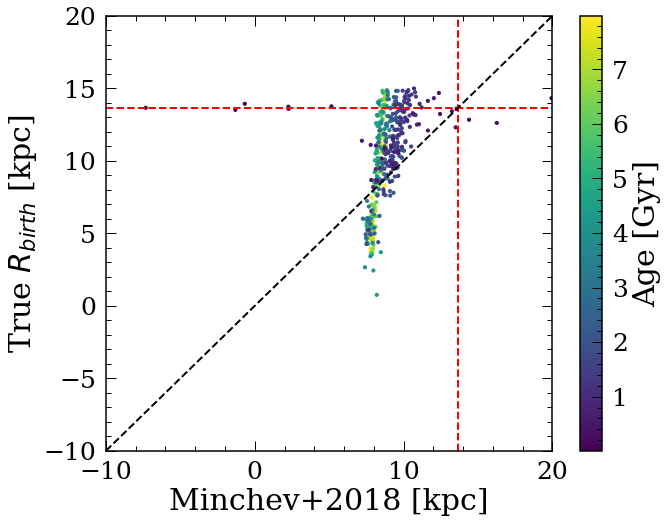

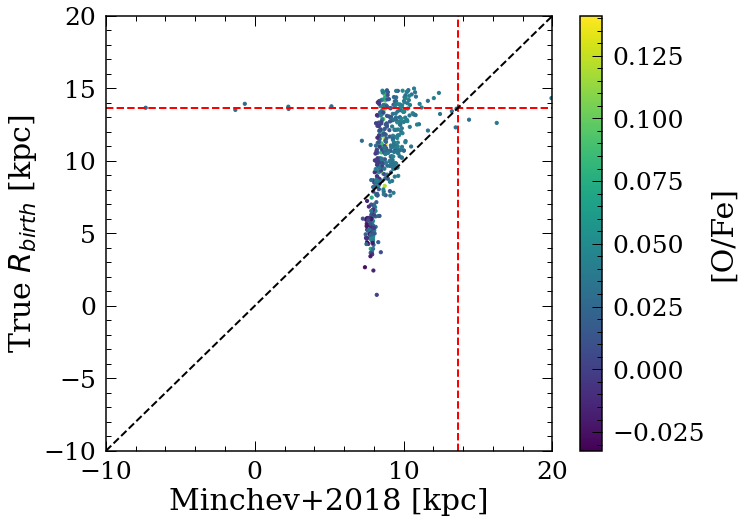

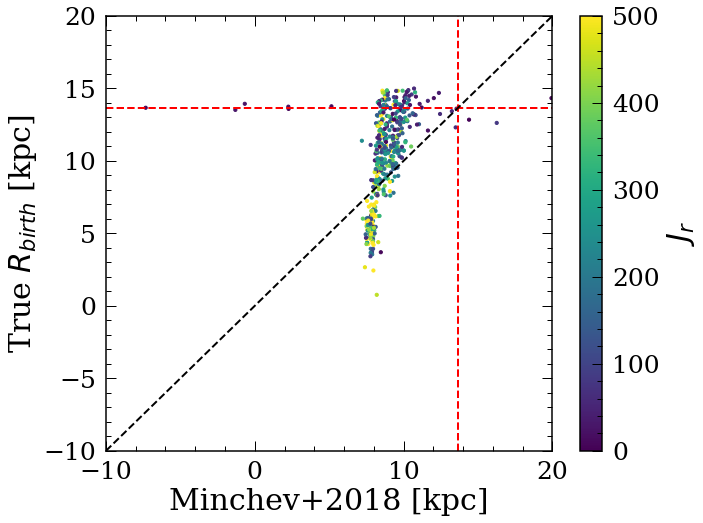

In [407]:
r_birth_true = data['R_bir'].values[m_sr]
# compare with true R_birth
plt.figure(figsize=(10,8))
plt.scatter(rbirth_inf, r_birth_true, s=10, c = ages_sr)
plt.plot([SolarRad,SolarRad],[-10,20],'r--')
plt.plot([-10,20],[SolarRad,SolarRad],'r--')
plt.plot([-10,20],[-10,20],'k--')
plt.xlim([-10,20])
plt.ylim([-10,20])
plt.xlabel('Minchev+2018 [kpc]')
plt.ylabel('True $R_{birth}$ [kpc]')
cbar = plt.colorbar()
cbar.set_label('Age [Gyr]',labelpad = 5)

# compare with true R_birth
plt.figure(figsize=(10,8))
plt.scatter(rbirth_inf, r_birth_true, s=10, c = data['ofe_scale'][m_sr])
plt.plot([SolarRad,SolarRad],[-10,20],'r--')
plt.plot([-10,20],[SolarRad,SolarRad],'r--')
plt.plot([-10,20],[-10,20],'k--')
plt.xlim([-10,20])
plt.ylim([-10,20])
plt.xlabel('Minchev+2018 [kpc]')
plt.ylabel('True $R_{birth}$ [kpc]')
cbar = plt.colorbar()
cbar.set_label('[O/Fe]',labelpad = 5)


# compare with true R_birth
plt.figure(figsize=(10,8))
plt.scatter(rbirth_inf, r_birth_true, s=10, c = data['Jr'][m_sr],vmin=0,vmax=500)
plt.plot([SolarRad,SolarRad],[-10,20],'r--')
plt.plot([-10,20],[SolarRad,SolarRad],'r--')
plt.plot([-10,20],[-10,20],'k--')
plt.xlim([-10,20])
plt.ylim([-10,20])
plt.xlabel('Minchev+2018 [kpc]')
plt.ylabel('True $R_{birth}$ [kpc]')
cbar = plt.colorbar()
cbar.set_label('$J_r$',labelpad = 5)